In [29]:
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [7]:
df = pd.read_csv('k_ablation.csv')
df = df.set_index(df.k)

In [8]:
k = df.k
ndcg = df.ndcg
mrr = df.mrr
recall = df.recall

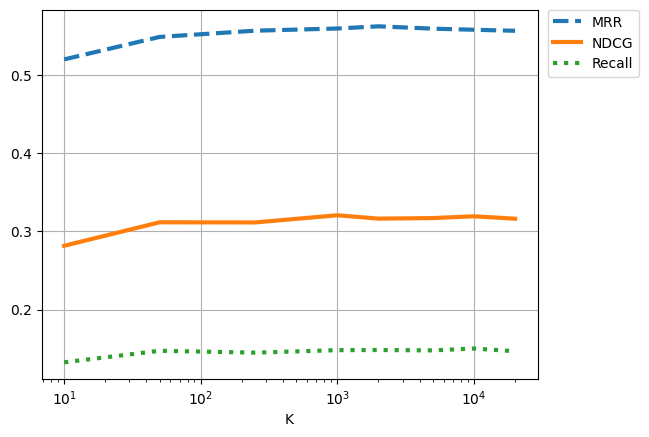

In [28]:
plt.plot(k, mrr, linestyle='--', linewidth=3, label='MRR')
plt.plot(k, ndcg, linestyle='-', linewidth=3, label='NDCG')
plt.plot(k, recall, linestyle=':',linewidth=3, label='Recall')
plt.grid()
plt.legend()
plt.xscale('log')
plt.xlabel('K')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('k_ablation.svg', format='svg', transparent=True)

In [10]:
'''sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

sns.color_palette('dark')

plt.figure(figsize=(8,4), tight_layout=True)'''

"sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks\n\nplt.rc('axes', titlesize=18)     # fontsize of the axes title\nplt.rc('axes', labelsize=14)    # fontsize of the x and y labels\nplt.rc('xtick', labelsize=13)    # fontsize of the tick labels\nplt.rc('ytick', labelsize=13)    # fontsize of the tick labels\nplt.rc('legend', fontsize=13)    # legend fontsize\nplt.rc('font', size=13)          # controls default text sizes\n\nsns.color_palette('dark')\n\nplt.figure(figsize=(8,4), tight_layout=True)"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


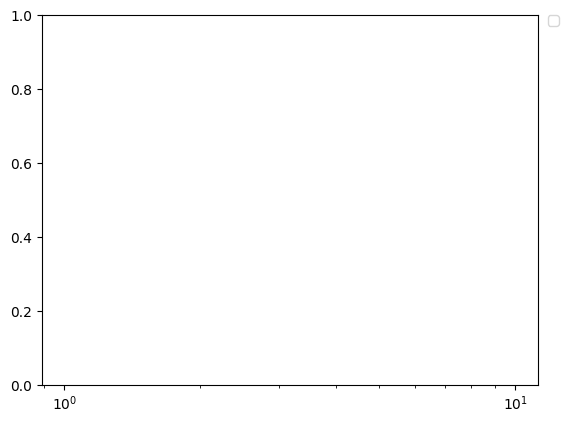

In [14]:
#ax = sns.lineplot(df[['mrr', 'ndcg', 'recall']])
#ax.set(xlabel='K')


In [ ]:
fig = ax.get_figure()
fig.savefig('k_ablation.eps', format='eps', transparent=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [30]:
weights = np.array([[4,1,3],
                    [3,1,4],
                    [4,2,2],
                    [5,3,1]])

ratings = np.array([[0,0,1,0],
                    [1,1,0,0]])

prod = torch.Tensor([rating * weights.T for rating in ratings]).type(torch.float32)

print(torch.amax(prod, axis=2))
print(torch.mean(prod, axis=2))

tensor([[4., 2., 2.],
        [4., 1., 4.]])
tensor([[1.0000, 0.5000, 0.5000],
        [1.7500, 0.5000, 1.7500]])


/var/folders/3b/cl8g_wbn7txby5hxcfcl5zwh0000gn/T/ipykernel_7346/57274810.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  prod = torch.Tensor([rating * weights.T for rating in ratings]).type(torch.float32)
